<div style="display: inline-block;">
    <img src="images/nhsa_logo.png" alt="Image" style="text-align: left;">
</div>

# Parent Gauge Data Analysis Project
---
## Exploratory Data Analysis

Exploratory Data Analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the .csv file into dataframe
df = pd.read_csv('../data/intv_data.csv')

In [ ]:
#for automated dta
#https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae
import dtale
import pandas as pd

dtale.show(pd.read_csv("../data/intv_data.csv"))

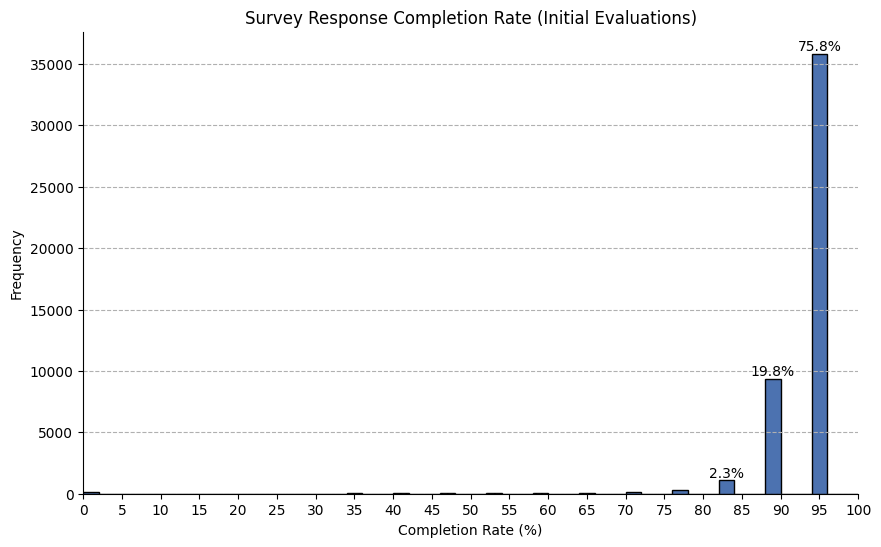

In [3]:
# Get the list of variable questions
# NOTE: consider removing Q10 and Q11 out of likert sum for initial
variable_questions_initial = ['Q2', 'Q3', 'Q4', 'Q5',
                      'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18']

# Filter DataFrame for 'Initial' evaluations
filtered_df = df[df['evaluation'] == 'Initial']

# Calculate the completion rate for each survey response
completion_rates = (filtered_df[variable_questions_initial].apply(lambda x: x.notnull().sum(), axis=1) / len(variable_questions_initial)) * 100

# Create a histogram of completion rates with detailed x-axis
bin_width = 2  # Adjust the bin width as desired
bins = np.arange(0, 101, bin_width)
plt.figure(figsize=(10, 6))
plt.hist(completion_rates, bins=bins, edgecolor='black', color='#4c72b0')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Frequency')
plt.title('Survey Response Completion Rate (Initial Evaluations)')
plt.xticks(np.arange(0, 101, 5))
plt.xlim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Calculate the total count of each bin
counts, _ = np.histogram(completion_rates, bins=bins)

# Get the indices of the three tallest bars
tallest_indices = np.argsort(counts)[-3:]

# Add frequency percentage above each bar for the three tallest bars
for i, rect in enumerate(plt.gca().patches):
    height = rect.get_height()
    if i in tallest_indices:
        percentage = (height / len(completion_rates)) * 100
        plt.gca().annotate(f'{percentage:.1f}%', (rect.get_x() + rect.get_width() / 2, height + 1),
                           ha='center', va='bottom')

plt.show()

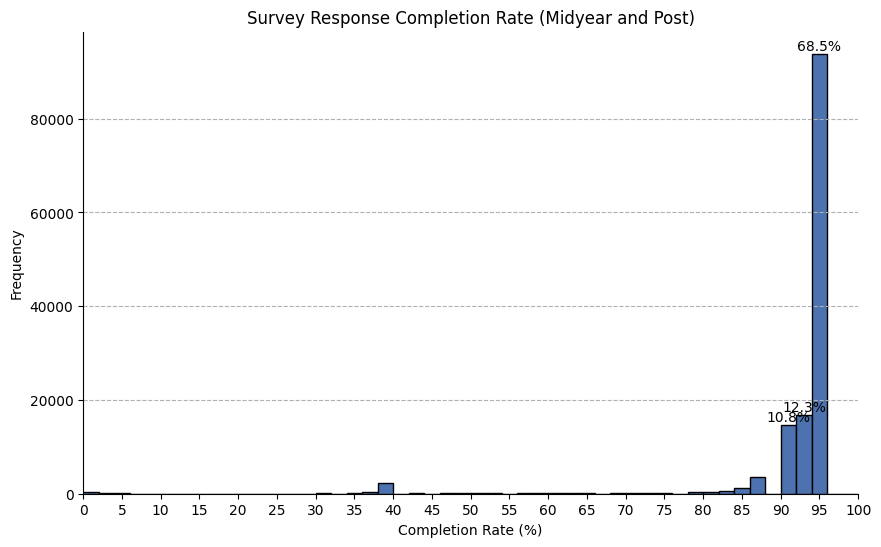

In [8]:
# Get the list of variable questions
# NOTE: consider removing Q10 to Q11 for calculating likert sum
variable_questions_midpost = ['Q2', 'Q2a', 'Q3', 'Q3a', 'Q4', 'Q4a', 'Q5', 'Q5a',
                      'Q6', 'Q6a', 'Q7', 'Q7a', 'Q8', 'Q8a', 'Q9', 'Q9a',
                      'Q10', 'Q10a', 'Q11', 'Q11a', 'Q12', 'Q12a', 'Q13', 'Q13a',
                      'Q14', 'Q14a', 'Q15', 'Q15a', 'Q16', 'Q16a', 'Q17', 'Q17a',
                      'Q18', 'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25']

# Filter DataFrame for 'midyear' and 'post' evaluations
filtered_df = df[df['evaluation'].isin(['Midyear', 'Post'])]

# Calculate the completion rate for each survey response
completion_rates = (filtered_df[variable_questions_midpost].apply(lambda x: x.notnull().sum(), axis=1) / len(variable_questions_midpost)) * 100

# Create a histogram of completion rates with detailed x-axis
bin_width = 2  # Adjust the bin width as desired
bins = np.arange(0, 101, bin_width)
plt.figure(figsize=(10, 6))
plt.hist(completion_rates, bins=bins, edgecolor='black', color='#4c72b0')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Frequency')
plt.title('Survey Response Completion Rate (Midyear and Post)')
plt.xticks(np.arange(0, 101, 5))
plt.xlim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Calculate the total count of each bin
counts, _ = np.histogram(completion_rates, bins=bins)

# Get the indices of the three tallest bars
tallest_indices = np.argsort(counts)[-3:]

# Add frequency percentage above each bar
for i, rect in enumerate(plt.gca().patches):
    height = rect.get_height()
    if i in tallest_indices:
        percentage = (height / len(completion_rates)) * 100
        plt.gca().annotate(f'{percentage:.1f}%', (rect.get_x() + rect.get_width() / 2, height + 1),
                           ha='center', va='bottom')

plt.show()

In [5]:
# Filter DataFrame for 'midyear' and 'post' evaluations
filtered_df = df[df['evaluation'].isin(['Initial'])]

# Calculate the percentage of missing values for each variable
missing_percentages = (filtered_df[variable_questions_initial].isnull().mean() * 100).round(2)

print(missing_percentages)

Q2      0.74
Q3      0.86
Q4      1.54
Q5      1.68
Q6      1.68
Q7      1.61
Q8      1.31
Q9      1.19
Q10    31.65
Q11    85.01
Q12     1.76
Q13     1.56
Q14     1.59
Q15     1.39
Q16     1.94
Q17     1.70
Q18     1.79
dtype: float64


In [9]:
# Filter DataFrame for 'midyear' and 'post' evaluations
filtered_df = df[df['evaluation'].isin(['Midyear', 'Post'])]

# Calculate the percentage of missing values for each variable
missing_percentages = (filtered_df[variable_questions_midpost].isnull().mean() * 100).round(2)

print(missing_percentages)

Q2       0.80
Q2a      3.22
Q3       1.22
Q3a      3.57
Q4       1.72
Q4a      3.98
Q5       1.56
Q5a      3.76
Q6       1.64
Q6a      3.81
Q7       1.73
Q7a      3.82
Q8       1.51
Q8a      3.79
Q9       1.20
Q9a      3.57
Q10     27.36
Q10a    29.06
Q11     83.92
Q11a    84.32
Q12      1.94
Q12a     4.23
Q13      1.67
Q13a     4.03
Q14      1.52
Q14a     3.99
Q15      1.44
Q15a     3.90
Q16      2.00
Q16a     4.48
Q17      2.17
Q17a     7.47
Q18      1.85
Q18a     4.30
Q19      3.57
Q20      3.71
Q21      3.93
Q22      4.26
Q23      4.57
Q24      4.81
Q25      4.08
dtype: float64


# Score averages by question and evaluation

In [12]:
#score averages by variable and evaluation
# Filter columns starting with 'Q'
q_columns = [col for col in df.columns if col.startswith('Q')]

# Group by 'Evaluation' and calculate mean for the filtered columns
grouped = df.groupby('evaluation')[q_columns].mean().reset_index()

# Pivot the table
pivot_table = grouped.pivot_table(index='evaluation', values=q_columns).T.reset_index()
pivot_table.columns = ['variable', 'initial_average', 'mid_average', 'post_average']

# Sort the table by the desired columns in descending order
pivot_table = pivot_table.sort_values(by=['initial_average', 'mid_average', 'post_average'], ascending=[False, False, False])

print(pivot_table)

   variable  initial_average  mid_average  post_average
25      Q20         4.881944     4.875236      4.892062
19      Q19         4.877273     4.863589      4.884041
11      Q15         4.841453     4.851430      4.869952
21      Q1b         4.767857     4.605423      4.681140
2      Q10a         4.757426     4.671965      4.737560
23      Q1d         4.750000     4.680572      4.733333
26      Q21         4.731034     4.735458      4.792890
15      Q17         4.666172     4.725125      4.757533
1       Q10         4.644672     4.620839      4.652255
0        Q1         4.635961     4.697305      4.737129
12     Q15a         4.619565     4.478484      4.615050
13      Q16         4.615891     4.664502      4.716556
14     Q16a         4.604396     4.507529      4.628281
32       Q3         4.585167     4.685911      4.716528
45      Q9a         4.571942     4.424104      4.556123
17      Q18         4.568853     4.615892      4.664838
27      Q22         4.567757     4.537685      4

## WEAKEST QUESTIONS

In [11]:
## QUESTIONS WITH WEAKEST RESPONSES
# Filter columns starting with 'Q'
q_columns = [col for col in df.columns if col.startswith('Q')]

# Function to calculate the proportion of responses that are either 1 or 2
def calculate_proportion(series):
    return round((((series == 1) | (series == 2)).sum() / series.notna().sum()) * 100, 2)

# Group by 'Evaluation' and apply the custom function
grouped = df.groupby('evaluation')[q_columns].apply(lambda x: x.apply(calculate_proportion)).reset_index()

# Pivot the table
pivot_table = grouped.pivot_table(index='evaluation', values=q_columns).T.reset_index()
pivot_table.columns = ['variable', 'initial_proportion', 'mid_proportion', 'post_proportion']

# Sort the table by the desired columns in descending order
pivot_table = pivot_table.sort_values(by=['initial_proportion', 'mid_proportion', 'post_proportion'], ascending=[False, False, False])

print(pivot_table)

   variable  initial_proportion  mid_proportion  post_proportion
35      Q4a               21.48           23.51            17.22
7       Q13               19.72           19.75            16.55
28      Q23               16.24           18.26            15.65
29      Q24               12.06           14.44            11.08
18     Q18a               10.62           12.51             8.75
10     Q14a                9.82           13.58             9.68
8      Q13a                7.55           11.13             8.64
47     QD1a                6.67            5.01             3.73
44       Q9                6.49            4.53             3.57
49     QD2a                6.25            3.78             3.18
20      Q1a                6.00            5.61             4.28
34       Q4                4.87            3.69             2.68
4      Q11a                4.65            3.85             3.29
14     Q16a                4.40            5.65             3.77
12     Q15a              